In [109]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [110]:
quran_1 = cv.imread('quran_1.png')
quran_1 = cv.cvtColor(quran_1, cv.COLOR_BGR2GRAY)

quran_2 = cv.imread('quran_2.png')
quran_2 = cv.cvtColor(quran_2, cv.COLOR_BGR2GRAY)

quran_3 = cv.imread('quran_3.png')
quran_3 = cv.cvtColor(quran_3, cv.COLOR_BGR2GRAY)

quran_4 = cv.imread('quran_4.png')
quran_4 = cv.cvtColor(quran_4, cv.COLOR_BGR2GRAY)

In [111]:
import cv2
import numpy as np
 
# Picture path
img = cv2.imread('quran_4.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
a = []
b = []
point_list_img1 = []
def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        a.append(x)
        b.append(y)
        cv2.circle(img, (x, y), 1, (0, 0, 255), thickness=5)
        cv2.putText(img, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,1.0, (0, 0, 0), thickness=1)
        cv2.imshow("image", img)
        point_list_img1.append((x,y))
    return point_list_img1
 
cv2.namedWindow("image")
cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [112]:
plt.figure(figsize=(20,10))
plt.imshow(quran_1,cmap='gray')

# part a

In [114]:
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

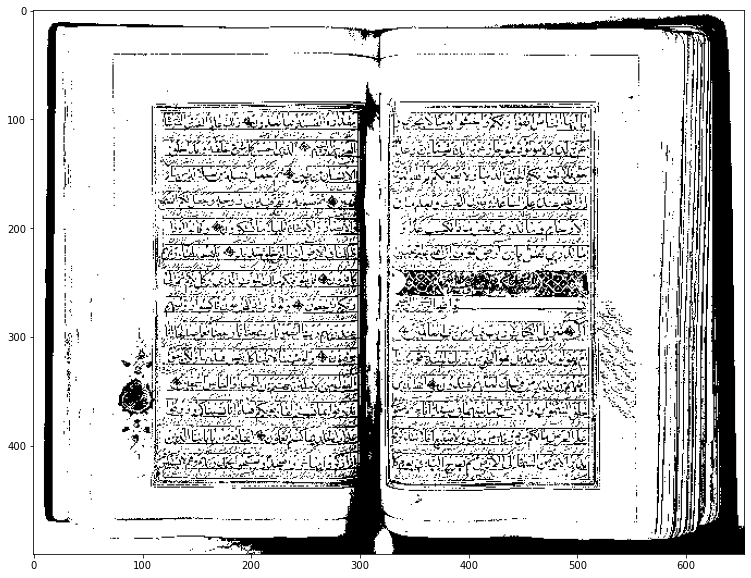

In [36]:
img = global_threshold(quran_1, 111, 211, 50)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

In [38]:
img = global_threshold(quran_2, 90, 211, 50)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

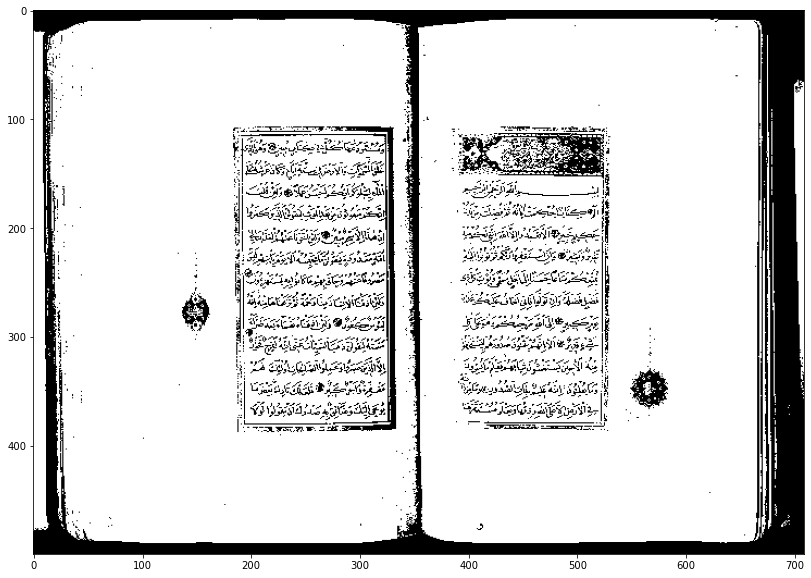

In [41]:
img = global_threshold(quran_3, 158, 211, 50)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

In [117]:
img = global_threshold(quran_4, 65, 211, 50)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

# part b

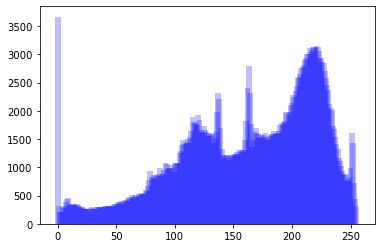

151


In [55]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


threshold_values = {}
h = [1]


def Hist(img):
   row, col = img.shape 
   y = np.zeros(256)
   for i in range(0,row):
      for j in range(0,col):
         y[img[i,j]] += 1
   x = np.arange(0,256)
   plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
   plt.show()
   return y


def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y


   
def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
           cnt += h[i]
    return cnt


def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w


def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i
    
    return m/float(w)


def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v
            

def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)
        
        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        mf = mean(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")
        
        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")
        
        if not math.isnan(V2w):
            threshold_values[i] = V2w


def get_optimal_threshold():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print (optimal_threshold[0])
    return optimal_threshold[0]


image = Image.open('quran_1.png').convert("L")
img = np.asarray(image)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.figure(figsize=(20,10))
plt.imshow(res,cmap='gray')
plt.savefig("otsu.jpg")

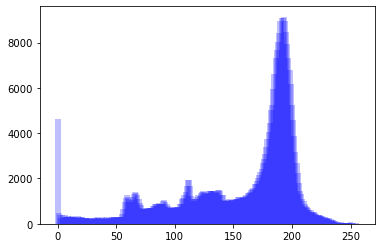

134


In [56]:
image = Image.open('quran_2.png').convert("L")
img = np.asarray(image)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.figure(figsize=(20,10))
plt.imshow(res,cmap='gray')
plt.savefig("otsu.jpg")

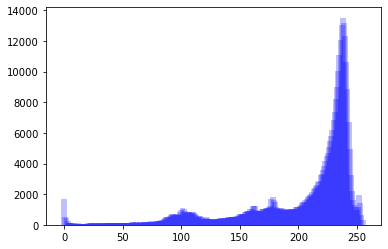

169


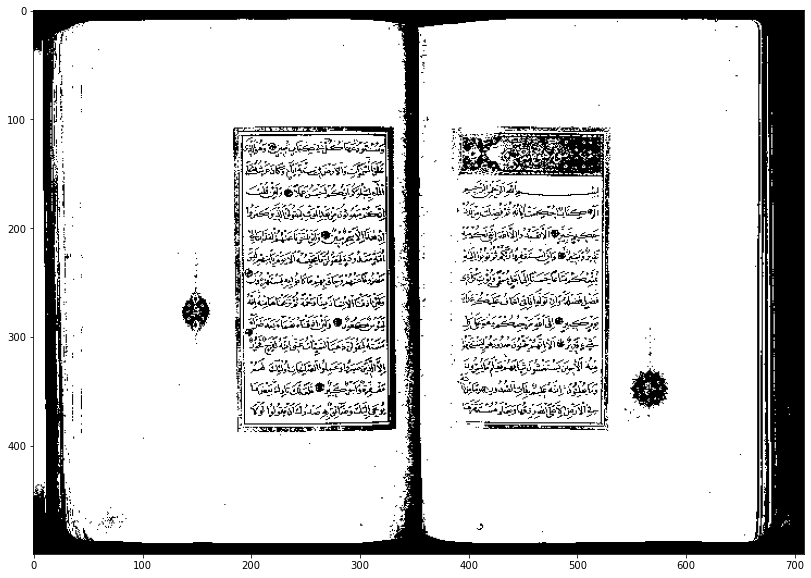

In [57]:
image = Image.open('quran_3.png').convert("L")
img = np.asarray(image)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.figure(figsize=(20,10))
plt.imshow(res,cmap='gray')
plt.savefig("otsu.jpg")

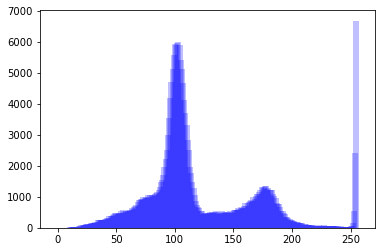

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


143


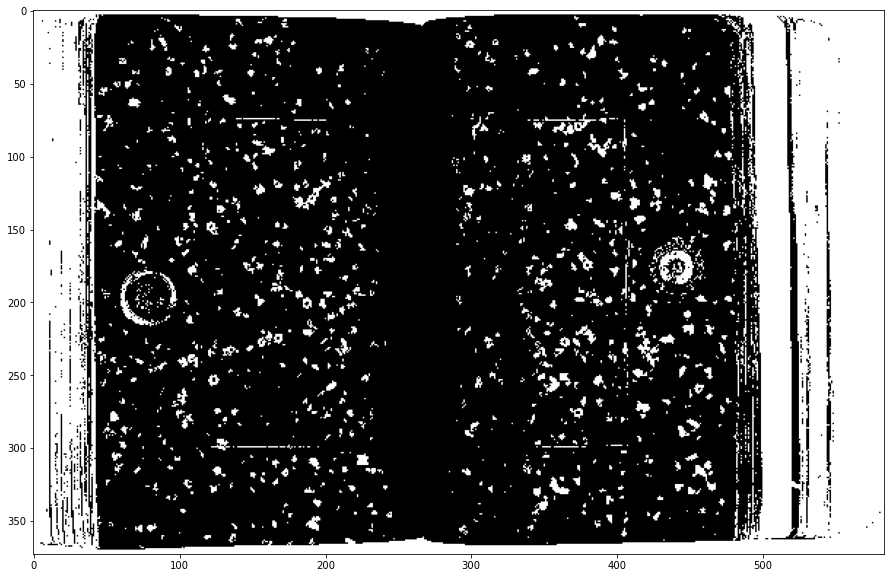

In [58]:
image = Image.open('quran_4.png').convert("L")
img = np.asarray(image)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.figure(figsize=(20,10))
plt.imshow(res,cmap='gray')
plt.savefig("otsu.jpg")

# part c

In [146]:
def lmean_threshold(img, w_size):

    # Obtaining rows and cols
    rows, cols = img.shape
    i_rows, i_cols = rows + 1, cols + 1

    # Computing integral image
    # Leaving first row and column in zero for convenience
    integ = np.zeros((i_rows, i_cols), np.float)

    integ[1:, 1:] = np.cumsum(np.cumsum(img.astype(np.float), axis=0), axis=1)

    # Defining grid
    x, y = np.meshgrid(np.arange(1, i_cols), np.arange(1, i_rows))

    # Obtaining local coordinates
    hw_size = w_size // 2
    x1 = (x - hw_size).clip(1, cols)
    x2 = (x + hw_size).clip(1, cols)
    y1 = (y - hw_size).clip(1, rows)
    y2 = (y + hw_size).clip(1, rows)

    # Obtaining local areas size
    l_size = (y2 - y1 + 1) * (x2 - x1 + 1)
    print(l_size.shape)

    # Computing sums
    sums = (integ[y2, x2] - integ[y2, x1 - 1] -
            integ[y1 - 1, x2] + integ[y1 - 1, x1 - 1])
    print(sums.shape)
    # Computing local means
    means = sums / l_size

    return means

In [77]:
means = lmean_threshold(quran_1, w_size=16)

In [80]:
def local_threshold(image, w_size,val_high,val_low):
    means = lmean_threshold(image, w_size)
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] >  means[i,j]:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

# w_size = 16,32,64,128 was tested, the best value is 16

In [81]:
img = local_threshold(quran_1,16, 255, 0)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

# w_size = 32 is appropriate c assumed to be 0

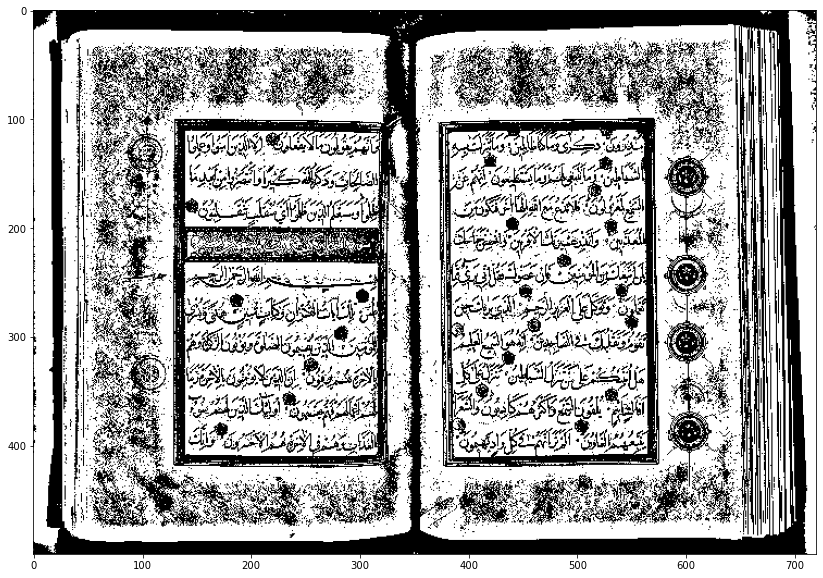

In [90]:
img = local_threshold(quran_2,32, 255, 0)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

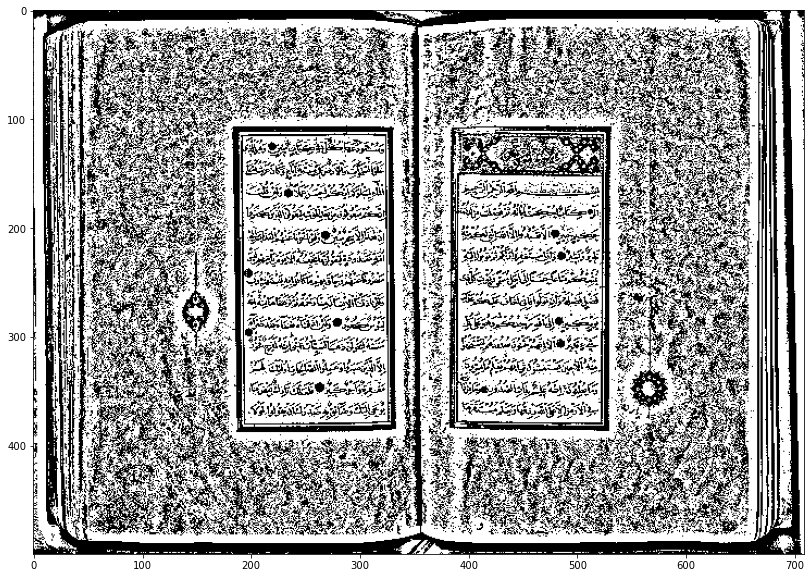

In [95]:
#w_size = 16
img = local_threshold(quran_3,16, 255, 0)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

# i can't find appropriate w_size for this image

In [105]:
img = local_threshold(quran_4,300, 255, 0)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

# part d

In [147]:
img = local_threshold(quran_4,16, 255, 0)

(373, 584)
(373, 584)


In [137]:
def gaussian_LP(size,sigma):
    center = np.array([size[0]/2 , size[1]/2])
    Xs,Ys=np.meshgrid(np.arange(size[1]) , np.arange(size[0]))
    indice_map=np.dstack([Ys,Xs])
    lpf=np.exp(-np.power(indice_map-center , 2).sum(axis=2)/(2*np.power(sigma,2)))
    return lpf

In [224]:
def lguassian_threshold(img, w_size,sigma):

    # Obtaining rows and cols
    rows, cols = img.shape
    i_rows, i_cols = rows + 1, cols + 1

    # Computing integral image
    # Leaving first row and column in zero for convenience
    integ = np.zeros((i_rows, i_cols), np.float)

    integ[1:, 1:] = np.cumsum(np.cumsum(img.astype(np.float), axis=0), axis=1)

    # Defining grid
    x, y = np.meshgrid(np.arange(1, i_cols), np.arange(1, i_rows))

    # Obtaining local coordinates
    hw_size = w_size // 2
    x1 = (x - hw_size).clip(1, cols)
    x2 = (x + hw_size).clip(1, cols)
    y1 = (y - hw_size).clip(1, rows)
    y2 = (y + hw_size).clip(1, rows)

    # Obtaining local areas size
    l_size = (y2 - y1 + 1) * (x2 - x1 + 1)


    # Computing sums
    sums = (integ[y2, x2] - integ[y2, x1 - 1] -
            integ[y1 - 1, x2] + integ[y1 - 1, x1 - 1])

    # Computing local means
    center = np.array([sums.shape[0]/2 , sums.shape[1]/2])
    Xs,Ys=np.meshgrid(np.arange(sums.shape[1]) , np.arange(sums.shape[0]))
    indice_map=np.dstack([Ys,Xs])
    lpf=np.exp(-np.power(indice_map-center , 2).sum(axis=2)/(2*np.power(sigma,2)))
    means = (sums) / l_size

    return means*lpf

In [225]:
def gaussian_threshold(image, w_size,val_high,val_low,sigma):
    means = lguassian_threshold(image, w_size,sigma)
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] >  means[i,j]:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

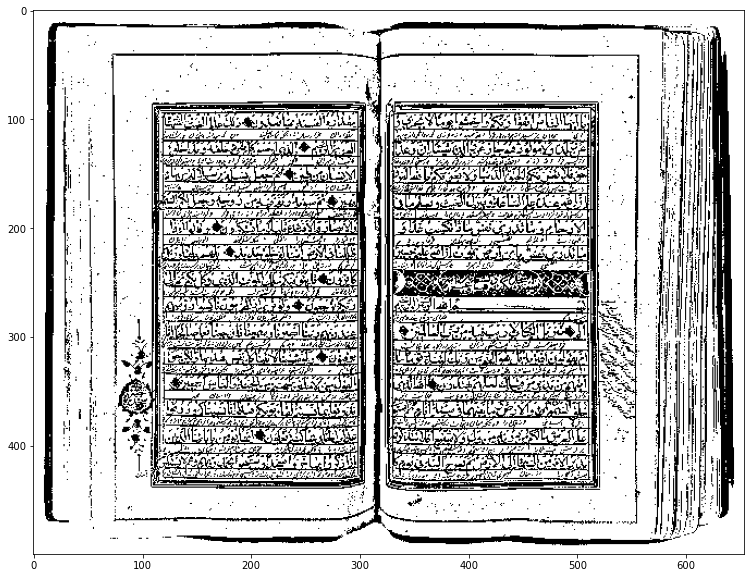

In [232]:
img = gaussian_threshold(quran_1, 16,255,0,500)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

In [231]:
img = gaussian_threshold(quran_2, 16,255,0,500)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

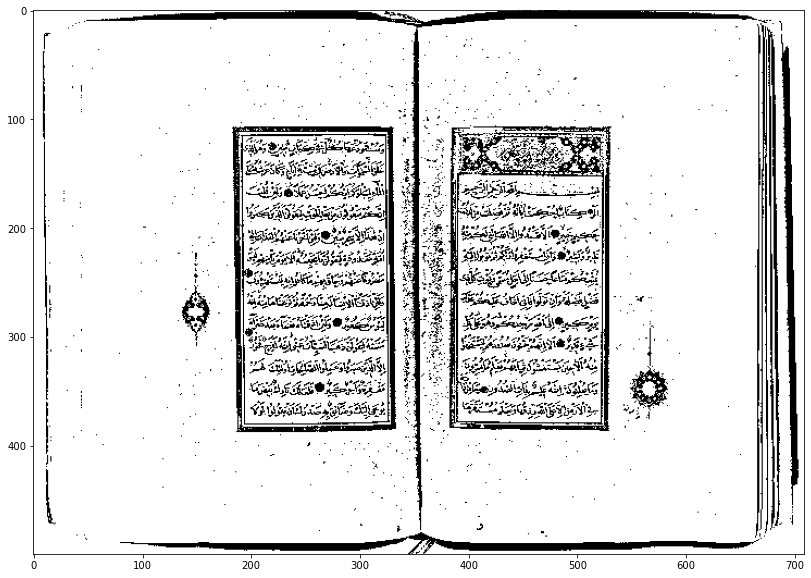

In [230]:
img = gaussian_threshold(quran_3, 16,255,0,500)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

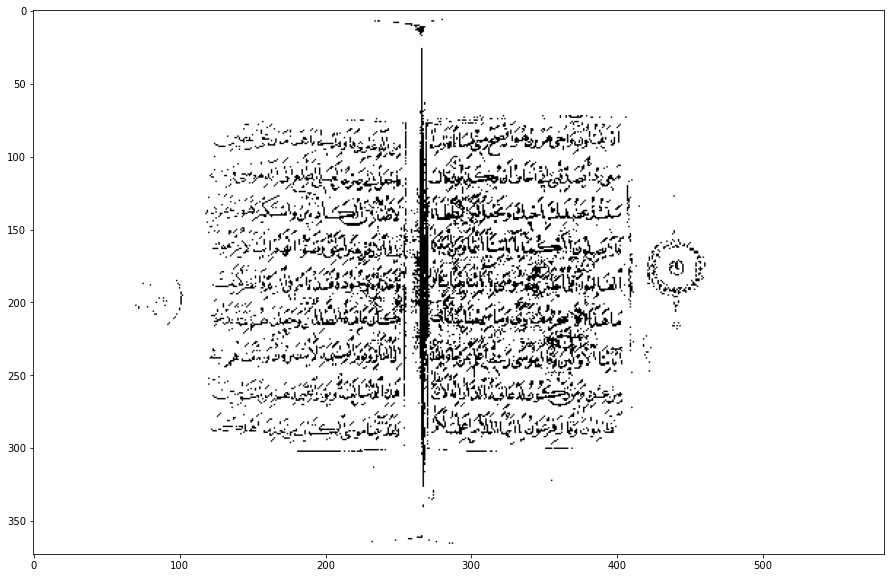

In [229]:
img = gaussian_threshold(quran_4, 20,255,0,150)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')